[https://www.kaggle.com/competitions/digit-recognizer/data?select=sample_submission.csv]

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import layers
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
sns.set(style='white', context='notebook', palette="hls")
# sns.color_palette("hls", 8)

In [61]:
train = pd.read_csv("train.csv")
target = "label"
features = train.columns[train.columns != target]

In [62]:
x_train = train[features]
y_train = train[target]
del train 

y_train.value_counts().sort_index()

label
0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: count, dtype: int64

/tmp/ipykernel_3065415/563962283.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="hls")


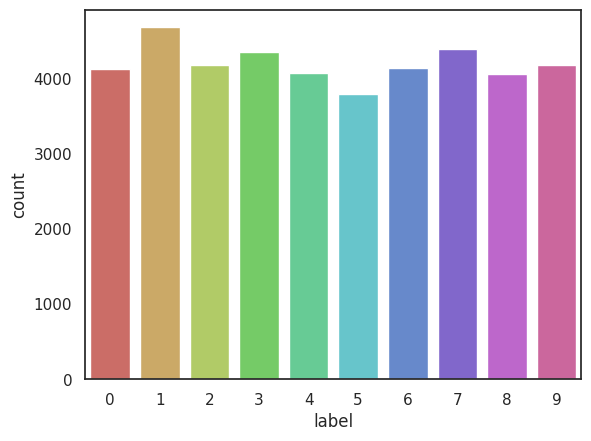

In [63]:
sns.countplot(x=y_train, palette="hls")
plt.show()

In [64]:
x_train.isna().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [65]:
y_train.isna().any()

False

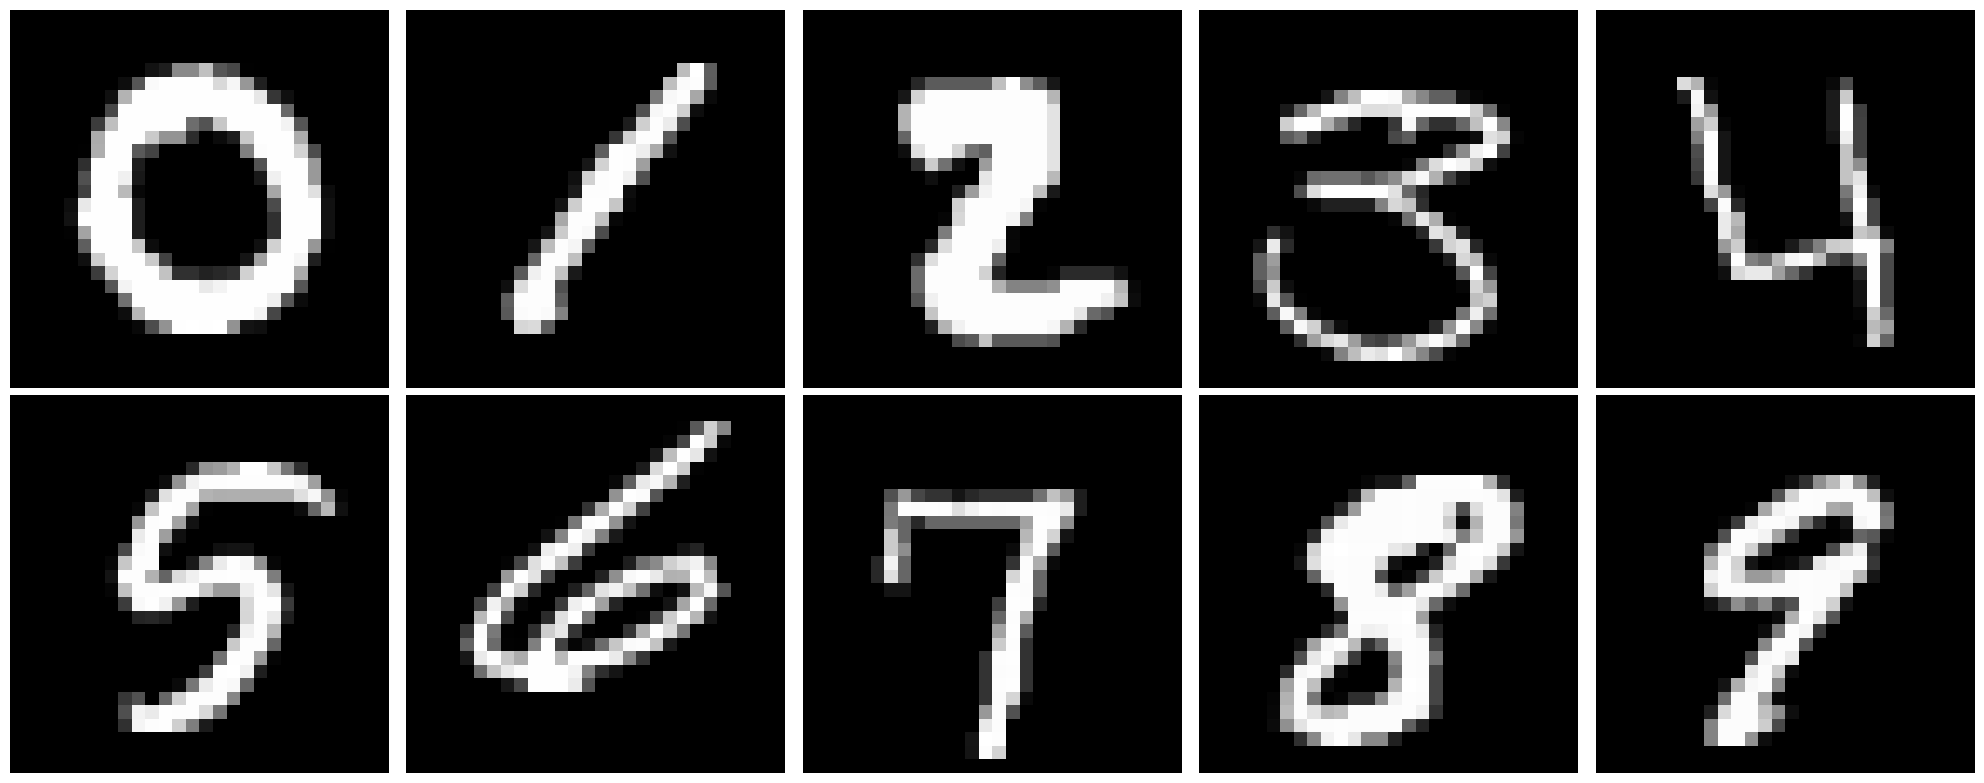

In [66]:
first_indices = y_train.groupby(y_train).idxmin()

fig, ax = plt.subplots(2, 5, figsize=(20,8))
ax = ax.flatten()

for i, index in enumerate(first_indices):
    number = x_train.iloc[index].values.reshape(28,28)
    ax[i].imshow(number, cmap="gray")
    ax[i].axis("off")
    
plt.tight_layout()
plt.show()
    

In [67]:
mas = MaxAbsScaler()
x_train = mas.fit_transform(x_train)

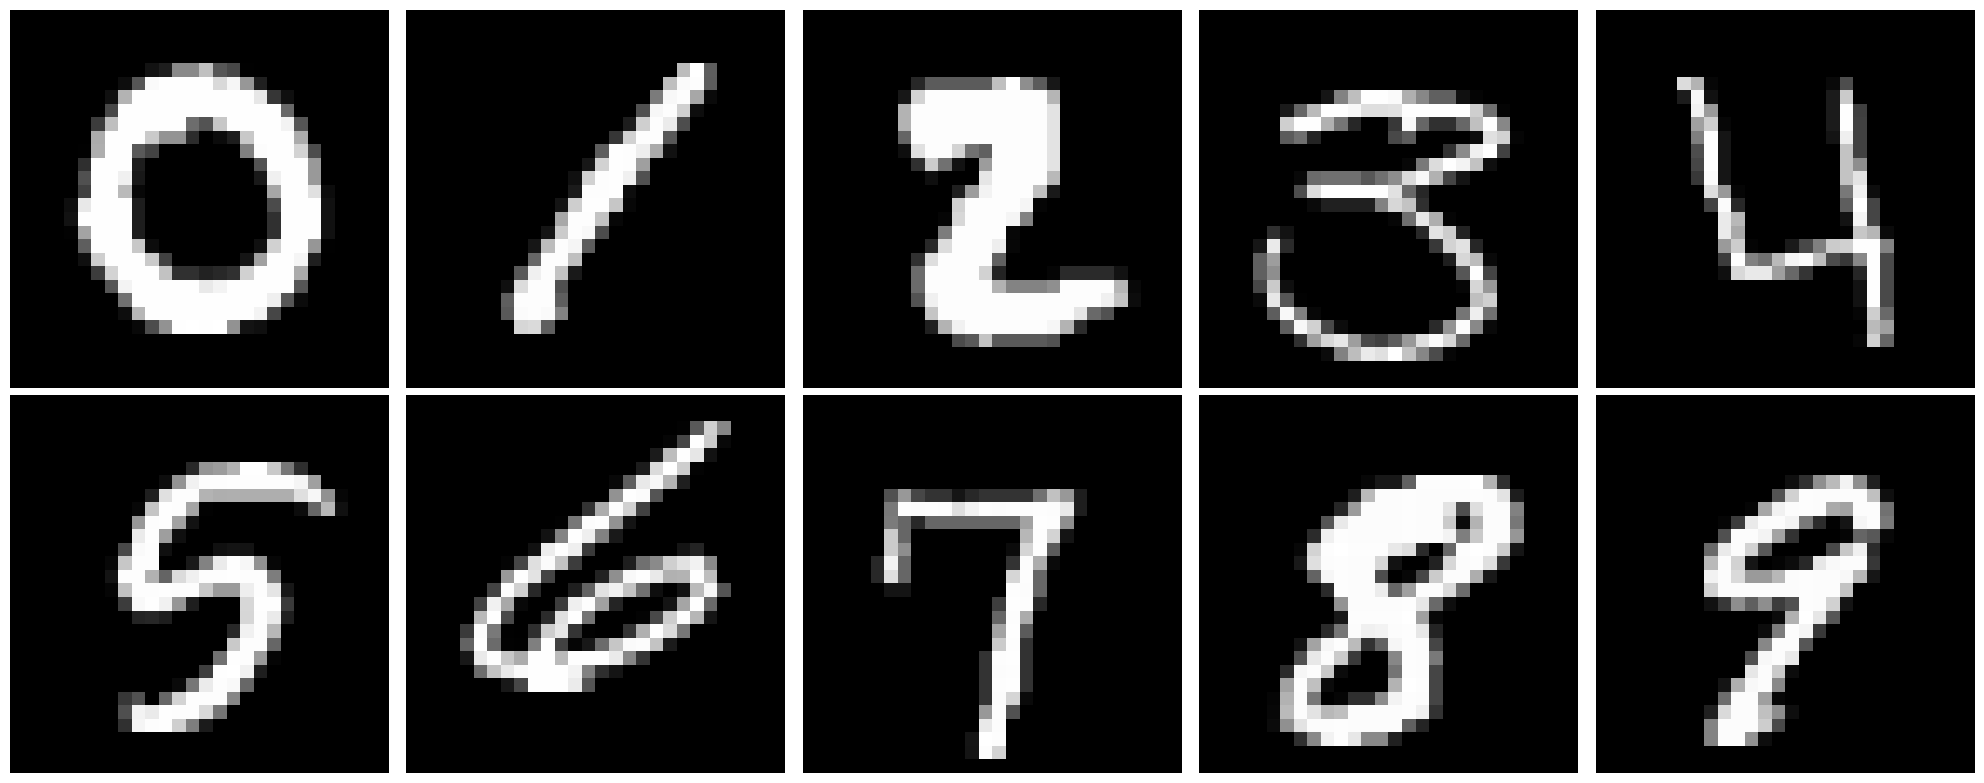

In [68]:
first_indices = y_train.groupby(y_train).idxmin()

fig, ax = plt.subplots(2, 5, figsize=(20,8))
ax = ax.flatten()

for i, index in enumerate(first_indices):
    number = x_train[index].reshape(28,28)
    ax[i].imshow(number, cmap="gray")
    ax[i].axis("off")
    
plt.tight_layout()
plt.show()

In [69]:
y_train = to_categorical(y_train, num_classes=10)

In [70]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)

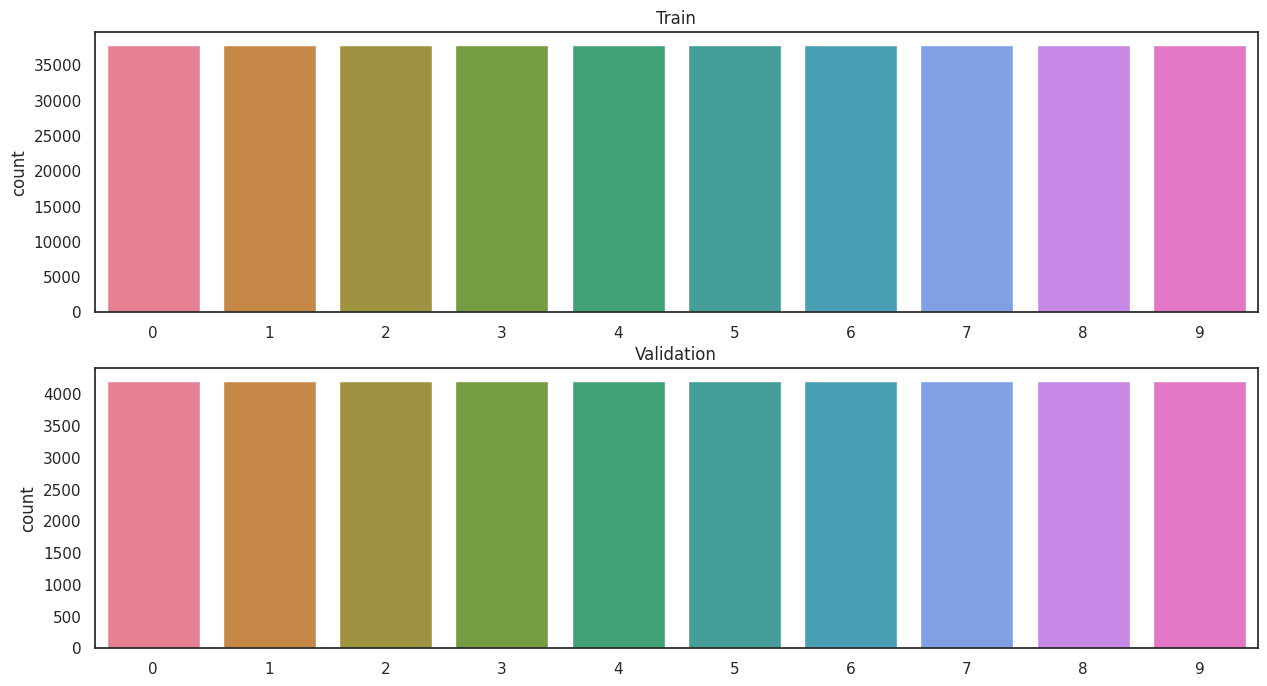

In [71]:
fig, ax = plt.subplots(2,1, figsize=(15,8))
ax = ax.flatten()
sns.countplot(y_train, ax=ax[0])
ax[0].set_title("Train")
sns.countplot(y_val, ax=ax[1])
ax[1].set_title("Validation")
plt.show()

In [72]:
print(x_train.shape)

(37800, 784)


In [73]:
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_val = x_val.reshape((len(x_val), 28, 28, 1))

model = Sequential([
    # Convolutional and pooling layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    # Flatten layer to transition from convolutional to dense layers
    layers.Flatten(),
    
    # Dense layers
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Assuming 10 classes for classification
])


optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08)

# Compile the model
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',  # Use 'categorical_crossentropy' for one-hot encoded labels
              metrics=['accuracy'])


In [74]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [75]:
datagen.fit(x_train)

In [76]:
logs = model.fit(datagen.flow(x_train, y_train, batch_size=86),
                 epochs=30, validation_data=(x_val, y_val),
                 verbose=2, steps_per_epoch=x_train.shape[0] // 86)

Epoch 1/30
439/439 - 9s - loss: 0.5131 - accuracy: 0.8336 - val_loss: 0.2228 - val_accuracy: 0.9264 - 9s/epoch - 20ms/step
Epoch 2/30
439/439 - 8s - loss: 0.1478 - accuracy: 0.9548 - val_loss: 0.0514 - val_accuracy: 0.9848 - 8s/epoch - 18ms/step
Epoch 3/30
439/439 - 8s - loss: 0.1046 - accuracy: 0.9671 - val_loss: 0.0468 - val_accuracy: 0.9862 - 8s/epoch - 18ms/step
Epoch 4/30
439/439 - 8s - loss: 0.0816 - accuracy: 0.9748 - val_loss: 0.0297 - val_accuracy: 0.9900 - 8s/epoch - 18ms/step
Epoch 5/30
439/439 - 8s - loss: 0.0679 - accuracy: 0.9783 - val_loss: 0.0294 - val_accuracy: 0.9905 - 8s/epoch - 18ms/step
Epoch 6/30
439/439 - 8s - loss: 0.0605 - accuracy: 0.9810 - val_loss: 0.0321 - val_accuracy: 0.9914 - 8s/epoch - 18ms/step
Epoch 7/30
439/439 - 8s - loss: 0.0572 - accuracy: 0.9830 - val_loss: 0.0264 - val_accuracy: 0.9924 - 8s/epoch - 18ms/step
Epoch 8/30
439/439 - 8s - loss: 0.0493 - accuracy: 0.9844 - val_loss: 0.0239 - val_accuracy: 0.9931 - 8s/epoch - 18ms/step
Epoch 9/30
439/4

In [77]:
# logs = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

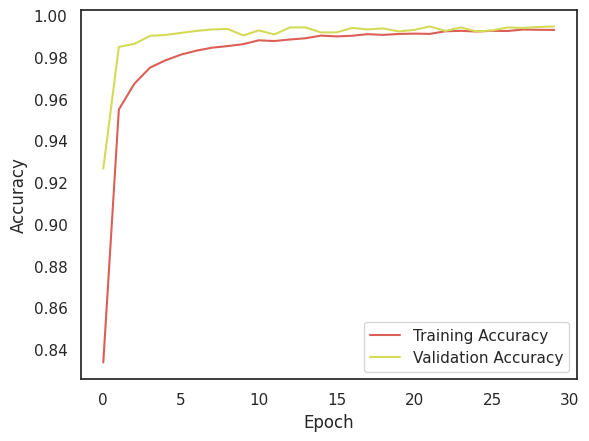

In [78]:
plt.plot(logs.history['accuracy'], label='Training Accuracy')
plt.plot(logs.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [79]:
model.save("digit_model.keras")

In [80]:
loaded_model = load_model("digit_model.keras")
predictions = loaded_model.predict(x_val)

accuracy = (np.argmax(predictions, axis=1) == np.argmax(y_val, axis=1)).mean()
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

132/132 [==============================] - 0s 2ms/step
Validation Accuracy: 99.45%


In [81]:
print(x_train[0].shape)

(28, 28, 1)


In [82]:
single_image = x_val[10].reshape((1, 28, 28, 1))

In [83]:
predictions = loaded_model.predict(single_image)

1/1 [==============================] - 0s 13ms/step


In [84]:
np.argmax(predictions)

4

In [85]:
y_val[10]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)